In [1]:
#Elif Nur Halat
#180205001
#Normal Öğretim

In [2]:
import sys
sys.path.insert(0, 'drive/DerinOgrenme')

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import tensorflow as tf

In [5]:
#1-Problem türü belirlendikten sonra girdiler ve çıktı veya çıktıları belirleyiniz.
#Problem veri setinin ilk 16 sütunundaki verileri inceleyerek fasulye türünün tahmin edilmesidir.
# Bu bir tek etiket çoklu sınıflandırma problemidir. Girdiler veri setinin ilk 16 sütunudur 
#ve çıktı ise 17. sütun olan son sütundur. Bu sütunda 7 farklı fasulye türü vardır ve çıktı olarak fasulyenin 
#bu sınıflardan hangisine ait olduğu belirlenecektir.

In [6]:
veriseti=pd.read_csv("/content/drive/MyDrive/DerinOgrenme/data-2.csv",delimiter=",")
veriseti.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
veriseti.shape

(13611, 17)

In [8]:
missing=veriseti.isnull().sum()
missing
#veri setinde boş veri yok

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
ozet=veriseti.describe()
ozet

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
#Veri setini girdi ve çıktılara ayırdım.
x=veriseti.drop("Class",axis=1)
x.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [11]:
y=veriseti["Class"]
y.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [12]:
#2-Veriyi analiz ediniz, kategorik veri var ise nümerik hale getirin veriyi ölçekleyin.

In [13]:
#İlk 16 sütun nümerik verilerden, 17. sütun  kategorik verilerden oluşur. Bu sütunu nümerik hale getirmeliyiz. 
#Her etikete sayısal bir değer verdim.
y=y.map({"SEKER":0,"BARBUNYA":1,"BOMBAY":2,"CALI":3,"DERMASON":4,"HOROZ":5,"SIRA":6})

num_labels=len(np.unique(y))
y=tf.keras.utils.to_categorical(y)
y



array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
from sklearn import preprocessing
#Veri setinde ölçeklendirme yaptım.
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(x)
x_ = pd.DataFrame(scaled)

In [15]:
x_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [16]:
#3- Veriyi eğitim, doğrulama ve test olmak üzere 3’e ayırın.

In [17]:
#veri setini test ve eğitim için ayırdım, doğrulama verisini eğitim başlarken ayıracağım.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_,y,test_size=0.2,random_state=10)

In [18]:
#4- Yapay sinir ağı modelinizi oluşturun ve modelin özetini ekleyin.

In [19]:
#Modeli oluşturdum. Modelde ara katmanlarda relu son katmanda tek etiket çoklu sınıflandırma olduğu için softmax aktivasyon fonksiyonunu  tercih ettim.
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 27,463
Trainable params: 27,463
Non-trainable params: 0
_________________________________________________________________


In [20]:
#5- Modeli eğitin ve train Acc, val Acc, train loss, val loss grafiklerini çizdirin. Modeliniz overfit oldu mu? Oldu ise ne gibi eklemeler yaptınız belirtin.

In [21]:
#Hata fonksiyonu, tek etiket çoklu sınıflandırma oduğu için cross entropy olmalı.
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)


Epoch 1/200
77/77 [==============================] - 3s 5ms/step - loss: 1.8460 - accuracy: 0.3801 - val_loss: 1.7288 - val_accuracy: 0.5813
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 1.6116 - accuracy: 0.6360 - val_loss: 1.4432 - val_accuracy: 0.6694
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 1.2728 - accuracy: 0.7012 - val_loss: 1.0706 - val_accuracy: 0.7291
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.9342 - accuracy: 0.7690 - val_loss: 0.7859 - val_accuracy: 0.8062
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.8308 - val_loss: 0.6004 - val_accuracy: 0.8567
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.8643 - val_loss: 0.4871 - val_accuracy: 0.8714
Epoch 7/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8790 - val_loss: 0.4139 - val_accuracy: 0.8944
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


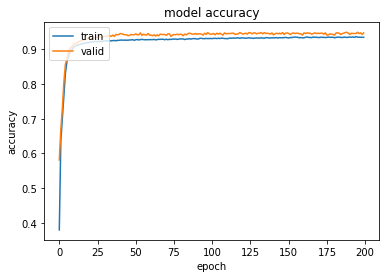

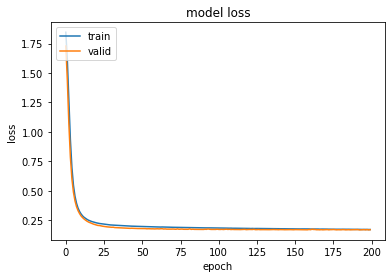

In [22]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [23]:
scores = model.evaluate(X_train,Y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,Y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

341/341 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9357
Training Accuracy: 93.57%

86/86 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9280
Testing Accuracy: 92.80%



In [24]:
#Accuracy ve loss grafiklerinden modelin overfit olmadığı anlaşılıyor.
#Validasyon ve eğitim arasında fark çok az, test sonuçları ve eğitim sonuçları da birbirine yakın bu nedenle overfit değil.

In [25]:
#6- Modeli test edin, karmaşıklık matrisini gösterin, Accuracy, Sensitivity, Specificity, Precision, F1 score ölçütlerini hesaplayıp bir tablo halinde verin.

In [26]:
pred=model.predict(X_test,batch_size=1,verbose=1)

2723/2723 [==============================] - 4s 2ms/step


[0, 4, 5, 4, 6, 0, 4, 5, 3, 6, 1, 0, 3, 3, 6, 4, 1, 1, 4, 6, 6, 4, 6, 0, 4, 4, 2, 6, 6, 0, 6, 4, 5, 4, 3, 6, 0, 4, 4, 6, 4, 0, 5, 5, 0, 4, 6, 6, 0, 2, 5, 1, 0, 5, 5, 6, 4, 6, 0, 4, 4, 4, 1, 5, 4, 5, 0, 3, 0, 4, 4, 6, 3, 5, 6, 1, 4, 0, 5, 5, 4, 5, 1, 3, 4, 3, 2, 6, 0, 0, 4, 5, 0, 0, 6, 3, 3, 1, 4, 4, 4, 6, 1, 6, 5, 5, 4, 3, 4, 4, 1, 6, 0, 3, 4, 0, 6, 3, 5, 3, 4, 4, 5, 3, 1, 0, 5, 1, 4, 6, 0, 6, 4, 3, 0, 5, 4, 4, 4, 0, 6, 4, 5, 3, 3, 4, 6, 5, 4, 4, 5, 6, 3, 0, 6, 2, 4, 4, 6, 4, 5, 5, 5, 6, 5, 0, 4, 1, 6, 5, 3, 4, 6, 1, 1, 3, 4, 4, 1, 5, 4, 1, 5, 6, 4, 4, 4, 4, 0, 1, 6, 5, 1, 6, 4, 4, 4, 5, 5, 4, 1, 2, 6, 5, 5, 3, 1, 0, 0, 4, 3, 3, 6, 0, 4, 5, 0, 5, 3, 0, 3, 3, 1, 5, 5, 4, 5, 5, 2, 4, 6, 0, 5, 0, 4, 6, 4, 2, 4, 2, 4, 3, 6, 6, 5, 4, 6, 2, 3, 1, 5, 1, 0, 4, 0, 5, 6, 4, 5, 4, 6, 6, 5, 4, 6, 4, 3, 4, 6, 0, 4, 6, 6, 6, 6, 4, 5, 4, 1, 6, 5, 6, 6, 4, 1, 4, 0, 0, 4, 5, 4, 1, 0, 5, 0, 0, 5, 6, 0, 2, 5, 2, 4, 0, 6, 3, 5, 6, 5, 0, 3, 4, 3, 5, 5, 6, 0, 0, 5, 5, 1, 4, 2, 6, 6, 5, 5, 0, 4, 6, 4, 0, 4, 

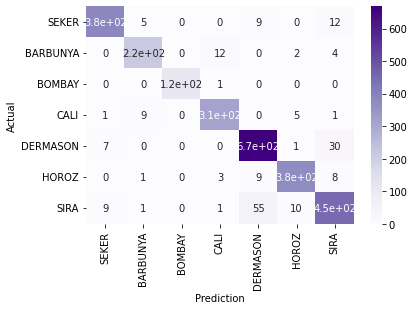

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test = model.predict(X_test)
y_pred=[]
for i in pred:
  a=np.argmax(i)
  y_pred.append(a)
print(y_pred)
y_=[]
for i in Y_test:
  a=np.argmax(i)
  y_.append(a)
cm = confusion_matrix(y_,y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"], yticklabels=["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"],
                cbar=True,cmap='Purples')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [28]:
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[17 16  0 17 73 18 55] [26 18  1 16 38 21 76] [385 215 117 314 668 375 453] [2295 2474 2605 2376 1944 2309 2139]


In [29]:
#Seker kategorisi için fp,fn,tp,tn
idx = 0
Stp=tp[idx]
Stn=tn[idx]
Sfp=fp[idx]
Sfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

17 26 385 2295


In [30]:
#Seker için ölçütlerin hesaplanması
S_Accuracy=(Stp+Stn)/(Stp+Stn+Sfp+Sfn)
S_Sensitivity=Stp/(Stp+Sfn)
S_Specificity=Stn/(Stn+Sfp)
S_Precision=Stp/(Stp+Sfp)
S_F1Score=2*((S_Precision*S_Sensitivity)/(S_Precision+S_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[S_Accuracy,S_Sensitivity,S_Specificity,S_Precision,S_F1Score]]
df=pd.DataFrame(table)
print('Seker için ölçütler:')
df

Seker için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.984209,0.93674,0.992647,0.957711,0.947109


In [31]:
#Barbunya kategorisi için fp,fn,tp,tn
idx = 1
Btp=tp[idx]
Btn=tn[idx]
Bfp=fp[idx]
Bfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

16 18 215 2474


In [32]:
#Barbunya için ölçütlerin hesaplanması
B_Accuracy=(Btp+Btn)/(Btp+Btn+Bfp+Bfn)
B_Sensitivity=Btp/(Btp+Bfn)
B_Specificity=Btn/(Btn+Bfp)
B_Precision=Btp/(Btp+Bfp)
B_F1Score=2*((B_Precision*B_Sensitivity)/(B_Precision+B_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[B_Accuracy,B_Sensitivity,B_Specificity,B_Precision,B_F1Score]]
df=pd.DataFrame(table)
print('Barbunya için ölçütler:')
df

Barbunya için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.987514,0.922747,0.993574,0.930736,0.926724


In [33]:
#Bombay kategorisi için fp,fn,tp,tn
idx = 2
Botp=tp[idx]
Botn=tn[idx]
Bofp=fp[idx]
Bofn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

0 1 117 2605


In [34]:
#Bombay için ölçütlerin hesaplanması
Bo_Accuracy=(Botp+Botn)/(Botp+Botn+Bofp+Bofn)
Bo_Sensitivity=Botp/(Botp+Bofn)
Bo_Specificity=Botn/(Botn+Bofp)
Bo_Precision=Botp/(Botp+Bofp)
Bo_F1Score=2*((Bo_Precision*Bo_Sensitivity)/(Bo_Precision+Bo_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[Bo_Accuracy,Bo_Sensitivity,Bo_Specificity,Bo_Precision,Bo_F1Score]]
df=pd.DataFrame(table)
print('Bombay için ölçütler:')
df

Bombay için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.999633,0.991525,1.0,1.0,0.995745


In [35]:
#Calı kategorisi için fp,fn,tp,tn
idx = 3
Ctp=tp[idx]
Ctn=tn[idx]
Cfp=fp[idx]
Cfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

17 16 314 2376


In [36]:
#Calı için ölçütlerin hesaplanması
C_Accuracy=(Ctp+Ctn)/(Ctp+Ctn+Cfp+Cfn)
C_Sensitivity=Ctp/(Ctp+Cfn)
C_Specificity=Ctn/(Ctn+Cfp)
C_Precision=Ctp/(Ctp+Cfp)
C_F1Score=2*((C_Precision*C_Sensitivity)/(C_Precision+C_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[C_Accuracy,C_Sensitivity,C_Specificity,C_Precision,C_F1Score]]
df=pd.DataFrame(table)
print('Calı için ölçütler:')
df

Calı için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.987881,0.951515,0.992896,0.94864,0.950076


In [37]:
#Dermason kategorisi için fp,fn,tp,tn
idx = 4
Dtp=tp[idx]
Dtn=tn[idx]
Dfp=fp[idx]
Dfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

73 38 668 1944


In [38]:
#Dermason için ölçütlerin hesaplanması
D_Accuracy=(Dtp+Dtn)/(Dtp+Dtn+Dfp+Dfn)
D_Sensitivity=Dtp/(Dtp+Dfn)
D_Specificity=Dtn/(Dtn+Dfp)
D_Precision=Dtp/(Dtp+Dfp)
D_F1Score=2*((D_Precision*D_Sensitivity)/(D_Precision+D_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[D_Accuracy,D_Sensitivity,D_Specificity,D_Precision,D_F1Score]]
df=pd.DataFrame(table)
print('Dermason için ölçütler:')
df

Dermason için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.959236,0.946176,0.963808,0.901484,0.92329


In [39]:
#Horoz kategorisi için fp,fn,tp,tn
idx = 5
Htp=tp[idx]
Htn=tn[idx]
Hfp=fp[idx]
Hfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

18 21 375 2309


In [40]:
#Horoz için ölçütlerin hesaplanması
H_Accuracy=(Htp+Htn)/(Htp+Htn+Hfp+Hfn)
H_Sensitivity=Htp/(Htp+Hfn)
H_Specificity=Htn/(Htn+Hfp)
H_Precision=Htp/(Htp+Hfp)
H_F1Score=2*((H_Precision*H_Sensitivity)/(H_Precision+H_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[H_Accuracy,H_Sensitivity,H_Specificity,H_Precision,H_F1Score]]
df=pd.DataFrame(table)
print('Horoz için ölçütler:')
df

Horoz için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.985678,0.94697,0.992265,0.954198,0.95057


In [41]:
#Sıra kategorisi için fp,fn,tp,tn
idx = 6
SItp=tp[idx]
SItn=tn[idx]
SIfp=fp[idx]
SIfn=fn[idx]
print(fp[idx], fn[idx], tp[idx], tn[idx])

55 76 453 2139


In [42]:
#Sıra için ölçütlerin hesaplanması
SI_Accuracy=(SItp+SItn)/(SItp+SItn+SIfp+SIfn)
SI_Sensitivity=SItp/(SItp+SIfn)
SI_Specificity=SItn/(SItn+SIfp)
SI_Precision=SItp/(SItp+SIfp)
SI_F1Score=2*((SI_Precision*SI_Sensitivity)/(SI_Precision+SI_Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[SI_Accuracy,SI_Sensitivity,SI_Specificity,SI_Precision,SI_F1Score]]
df=pd.DataFrame(table)
print('Sıra için ölçütler:')
df

Sıra için ölçütler:


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.951891,0.856333,0.974932,0.891732,0.873674


In [43]:
#7- Deneme yanılmalar sonucu elde ettiğiniz modelinizi farklı optimizasyon algoritmaları deneyerek tekrar eğitin,
# validation loss ve validation accuracy grafiklerini tek bir görselde gösterin ve sonuçları yorumlayın aşağıdaki görselde örnek verilmiştir. 

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
history_Adamax=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 2s 5ms/step - loss: 0.2027 - accuracy: 0.9206 - val_loss: 0.0689 - val_accuracy: 0.9357
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9286 - val_loss: 0.0570 - val_accuracy: 0.9376
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9289 - val_loss: 0.0526 - val_accuracy: 0.9403
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9298 - val_loss: 0.0514 - val_accuracy: 0.9376
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9306 - val_loss: 0.0492 - val_accuracy: 0.9412
Epoch 6/200
77/77 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9307 - val_loss: 0.0484 - val_accuracy: 0.9412
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9316 - val_loss: 0.0480 - val_accuracy: 0.9421
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


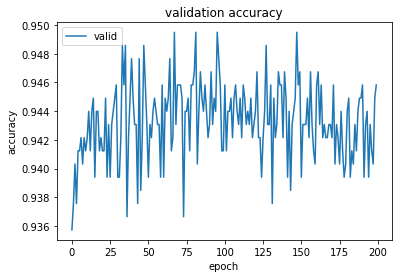

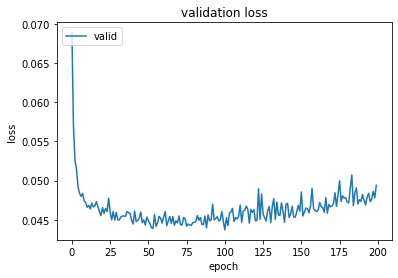

In [45]:
import matplotlib.pyplot as plt

print(history_Adamax.history.keys())
# summarize history for accuracy
plt.plot(history_Adamax.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adamax.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adam=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0399 - accuracy: 0.9460 - val_loss: 0.0507 - val_accuracy: 0.9467
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9457 - val_loss: 0.0536 - val_accuracy: 0.9403
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9441 - val_loss: 0.0464 - val_accuracy: 0.9431
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9425 - val_loss: 0.0488 - val_accuracy: 0.9311
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9479 - val_loss: 0.0490 - val_accuracy: 0.9357
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9466 - val_loss: 0.0525 - val_accuracy: 0.9330
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9469 - val_loss: 0.0550 - val_accuracy: 0.9339
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


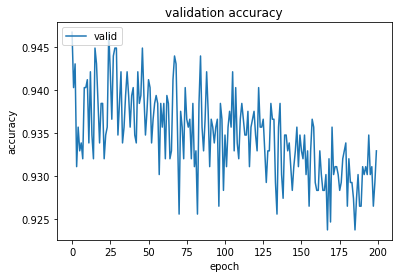

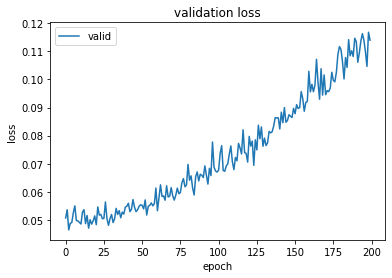

In [47]:
import matplotlib.pyplot as plt

print(history_adam.history.keys())
# summarize history for accuracy
plt.plot(history_adam.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_adam.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [48]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
history_Adadelta=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 1s 5ms/step - loss: 0.0111 - accuracy: 0.9870 - val_loss: 0.1138 - val_accuracy: 0.9330
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9870 - val_loss: 0.1137 - val_accuracy: 0.9320
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9874 - val_loss: 0.1136 - val_accuracy: 0.9330
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9880 - val_loss: 0.1135 - val_accuracy: 0.9330
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9883 - val_loss: 0.1134 - val_accuracy: 0.9320
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9887 - val_loss: 0.1133 - val_accuracy: 0.9330
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9890 - val_loss: 0.1132 - val_accuracy: 0.9330
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


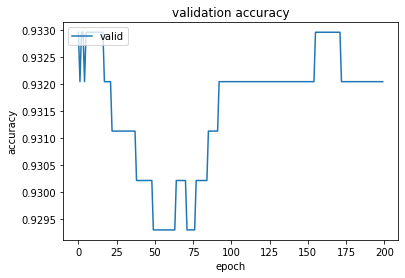

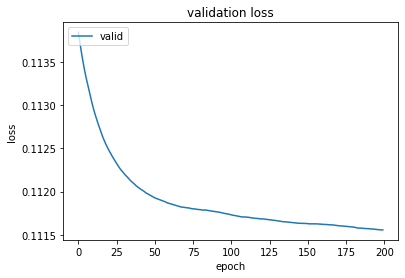

In [49]:
import matplotlib.pyplot as plt

print(history_Adadelta.history.keys())
# summarize history for accuracy
plt.plot(history_Adadelta.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adadelta.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [50]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history_Adagrad=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9938 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 2/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9937 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 3/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9939 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 4/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9940 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 5/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9940 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 6/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.9941 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 7/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9941 - val_loss: 0.1115 - val_accuracy: 0.9320
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


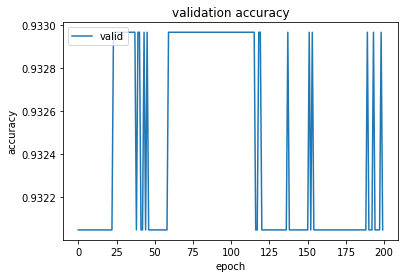

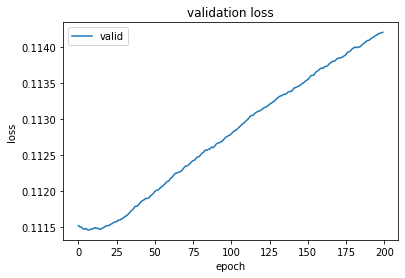

In [51]:
import matplotlib.pyplot as plt

print(history_Adagrad.history.keys())
# summarize history for accuracy
plt.plot(history_Adagrad.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adagrad.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [52]:
model.compile(loss='binary_crossentropy', optimizer='Ftrl', metrics=['accuracy'])
history_Ftrl=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 2s 6ms/step - loss: 0.6825 - accuracy: 0.2699 - val_loss: 0.6899 - val_accuracy: 0.2571
Epoch 2/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.2613 - val_loss: 0.6877 - val_accuracy: 0.2571
Epoch 3/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.2613 - val_loss: 0.6860 - val_accuracy: 0.2571
Epoch 4/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.2613 - val_loss: 0.6844 - val_accuracy: 0.2571
Epoch 5/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.2613 - val_loss: 0.6831 - val_accuracy: 0.2571
Epoch 6/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.2613 - val_loss: 0.6818 - val_accuracy: 0.2571
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.2613 - val_loss: 0.6807 - val_accuracy: 0.2571
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


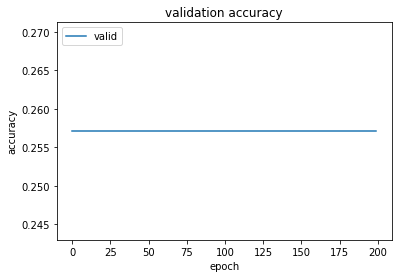

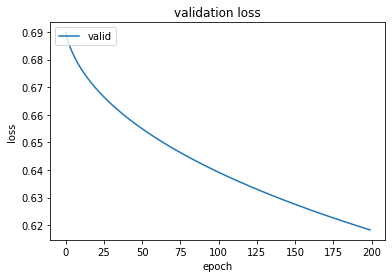

In [53]:
import matplotlib.pyplot as plt

print(history_Ftrl.history.keys())
# summarize history for accuracy
plt.plot(history_Ftrl.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Ftrl.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [54]:
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history_Nadam=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 2s 7ms/step - loss: 0.4506 - accuracy: 0.2620 - val_loss: 0.3717 - val_accuracy: 0.2571
Epoch 2/200
77/77 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.2613 - val_loss: 0.3630 - val_accuracy: 0.2571
Epoch 3/200
77/77 [==============================] - 0s 6ms/step - loss: 0.3535 - accuracy: 0.2613 - val_loss: 0.3461 - val_accuracy: 0.2571
Epoch 4/200
77/77 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.2617 - val_loss: 0.3367 - val_accuracy: 0.2672
Epoch 5/200
77/77 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.3354 - val_loss: 0.2978 - val_accuracy: 0.4729
Epoch 6/200
77/77 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.5057 - val_loss: 0.2602 - val_accuracy: 0.4803
Epoch 7/200
77/77 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5151 - val_loss: 0.2371 - val_accuracy: 0.4995
Epoch 8/200
7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


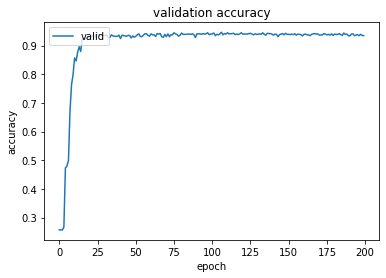

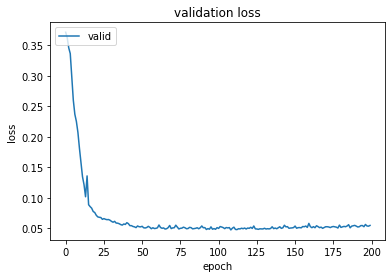

In [55]:
import matplotlib.pyplot as plt

print(history_Nadam.history.keys())
# summarize history for accuracy
plt.plot(history_Nadam.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Nadam.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [56]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history_RMSprop=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
77/77 [==============================] - 2s 10ms/step - loss: 0.0427 - accuracy: 0.9388 - val_loss: 0.0559 - val_accuracy: 0.9320
Epoch 2/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0412 - accuracy: 0.9402 - val_loss: 0.0558 - val_accuracy: 0.9412
Epoch 3/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.9401 - val_loss: 0.0694 - val_accuracy: 0.9229
Epoch 4/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0416 - accuracy: 0.9426 - val_loss: 0.0595 - val_accuracy: 0.9348
Epoch 5/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9402 - val_loss: 0.0545 - val_accuracy: 0.9403
Epoch 6/200
77/77 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.9410 - val_loss: 0.0569 - val_accuracy: 0.9403
Epoch 7/200
77/77 [==============================] - 0s 5ms/step - loss: 0.0424 - accuracy: 0.9412 - val_loss: 0.0548 - val_accuracy: 0.9421
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


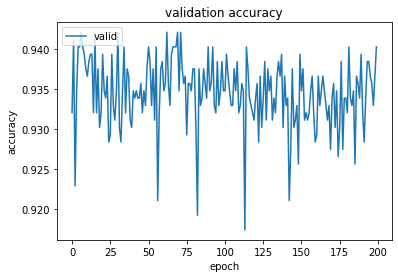

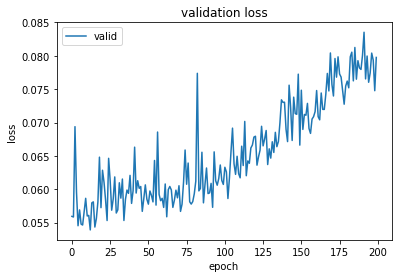

In [57]:
import matplotlib.pyplot as plt

print(history_RMSprop.history.keys())
# summarize history for accuracy
plt.plot(history_RMSprop.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


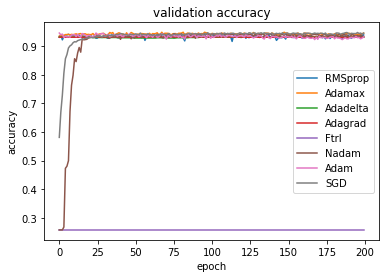

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


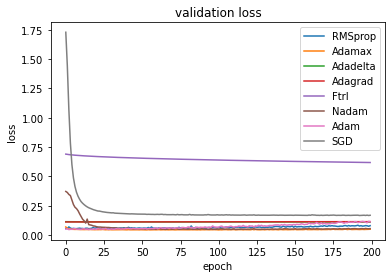

In [58]:

# summarize history for accuracy
plt.plot(history_RMSprop.history['val_accuracy'])
plt.plot(history_Adamax.history['val_accuracy'])
plt.plot(history_Adadelta.history['val_accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'])
plt.plot(history_Ftrl.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','Adam','SGD'], loc='lower ight')
plt.show()

# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.plot(history_Ftrl.history['val_loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.plot(history_adam.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','Adam','SGD'], loc='lower ight')
plt.show()

In [ ]:
#SGD algoritması 0,6 gibi bir değerden başlayıp 0.9’u geçiyor doğrulukta, hatada ise diğerlerine göre daha yüksek değerlerden başlayıp düşerken 
#diğer algoritmalar kadar iyi olmasa da onlara çok yakın bir değer elde ediyor. Adamax, Adam, Adadelta, Adagrad, RMSprop birbirine yakın ve en iyi değerleri 
#veriyorlar, Bu değerler doğruluk için yaklaşık 0.93 hata için ise yaklaşık 0.11. Ftrl  hem doğruluk da hem de hata da en kötü değerleri elde eden algoritma.
#Bu değerler doğruluk için 0.25 ve hata için 0.6. Nadam doğrulukta çok düşük değerlerden başlayarak 0.93 ile iyi oranlara ulaşıyor, hatada da ortalama
#değerlerden başlayıp 0.05 ile en iyi değerlerden birini elde ediyor. SGD, Adamax, Adam, Adadelta, Adagrad, RMSprop algoritmaları problem için uygun 
#ancak Nadam küçük bir fark ile diğerlerinden daha başarılı. Ftrl ise bu problem için iyi bir algoritma değil.